Problem Statement:
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.


Guidelines:
● Use pandas to accumulate data from multiple data files.
● Use plotly (visualization library) to create interactive visualizations.
● Use Facebook prophet library to make time series models.
● Visualize the prediction by combining these technologies.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/covid_19.csv')

In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,49068.0,21.433730,24.950320,-51.7963,7.873054,23.6345,41.204380,7.170690e+01
Long,49068.0,23.528236,70.442740,-135.0000,-15.310100,21.7453,80.771797,1.780650e+02
Confirmed,49068.0,16884.904255,127300.205272,0.0000,4.000000,168.0000,1518.250000,4.290259e+06
Deaths,49068.0,884.179160,6313.584411,0.0000,0.000000,2.0000,30.000000,1.480110e+05
Recovered,49068.0,7915.713479,54800.918731,0.0000,0.000000,29.0000,666.000000,1.846641e+06
Active,49068.0,8085.011617,76258.903026,-14.0000,0.000000,26.0000,606.000000,2.816444e+06


In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.rename(columns={'Province/State':'State','Country/Region':'Country'},inplace=True)

In [ ]:
df.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
df.groupby('Country')[['Deaths','Confirmed','Recovered']].sum()

,Deaths,Confirmed,Recovered
Country,,,
Afghanistan,49098,1936390,798240
Albania,5708,196702,118877
Algeria,77972,1179755,755897
Andorra,5423,94404,69074
Angola,1078,22662,6573
...,...,...,...
West Bank and Gaza,1370,233461,61124
Western Sahara,63,901,648
Yemen,17707,67180,23779


In [ ]:
top=df[df['Date']==df['Date'].max()]
top

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
top.shape

(261, 10)

In [ ]:
c=top.groupby('Country')[['Confirmed','Deaths','Recovered','Active']].sum().reset_index()
c

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
import plotly.express as px

In [ ]:
x = px.choropleth(c,locations= 'Country', locationmode = 'country names', color = 'Deaths',
                 hover_name = 'Country', range_color = [1,40000], color_continuous_scale='Peach',
                 title = 'Deaths case country wise')
x.show()

In [ ]:
x=px.choropleth(c,locations='Country',locationmode='country names',color='Active',hover_name='Country',
range_color=[1,40000],color_continuous_scale='Peach',title='Active case country wise')
x.show()

In [ ]:
c=top.groupby('Date')['Active'].sum().reset_index()
c

,Date,Active
0,2020-07-27,6358362


In [ ]:
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       14664 non-null  object        
 1   Country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   Date        49068 non-null  datetime64[ns]
 5   Confirmed   49068 non-null  int64         
 6   Deaths      49068 non-null  int64         
 7   Recovered   49068 non-null  int64         
 8   Active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
x=px.choropleth(df,locations='Country',locationmode='country names',color='Deaths',hover_name='Country',
                animation_free='Date',
                range_color=[1,50000],color_continuous_scale='Viridis',
                title='Death case wise country')
x.show()

In [ ]:
df.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
t_cases=df.groupby('Date')[['Confirmed']].sum().reset_index()
t_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


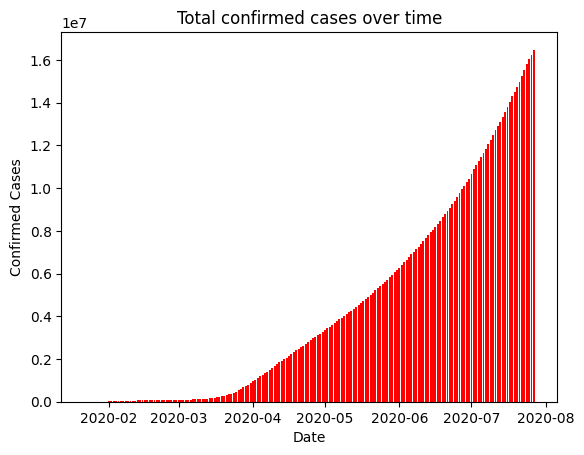

In [ ]:
plt.bar(t_cases['Date'],t_cases['Confirmed'],color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Total confirmed cases over time')
plt.show()

In [ ]:
t_cases_death=df.groupby('Date')['Deaths'].sum().reset_index()
t_cases_death

,Date,Deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


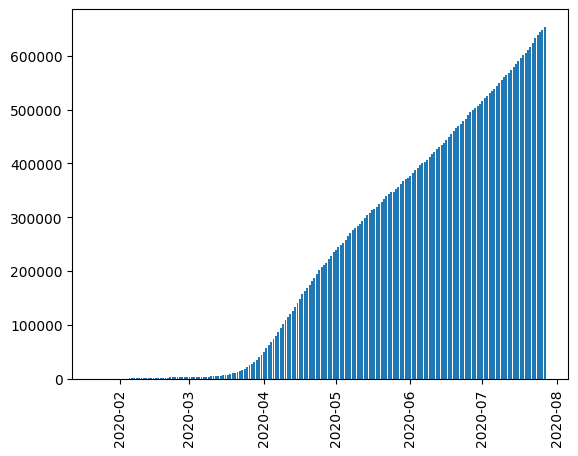

In [ ]:
plt.bar(t_cases_death['Date'],t_cases_death['Deaths'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
t_cases_active=df.groupby('Date')['Active'].sum().reset_index()
t_cases_active

,Date,Active
0,2020-01-22,510
1,2020-01-23,606
2,2020-01-24,879
3,2020-01-25,1353
4,2020-01-26,2010
...,...,...
183,2020-07-23,6166006
184,2020-07-24,6212290
185,2020-07-25,6243930
186,2020-07-26,6309711


<BarContainer object of 188 artists>

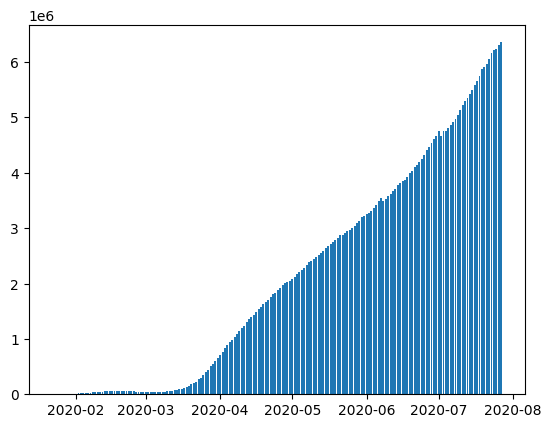

In [ ]:
plt.bar(t_cases_active['Date'],t_cases_active['Active'])

In [ ]:
df.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
t_cases_recovered=df.groupby('Date')['Recovered'].sum().reset_index()
t_cases_recovered

,Date,Recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


<BarContainer object of 188 artists>

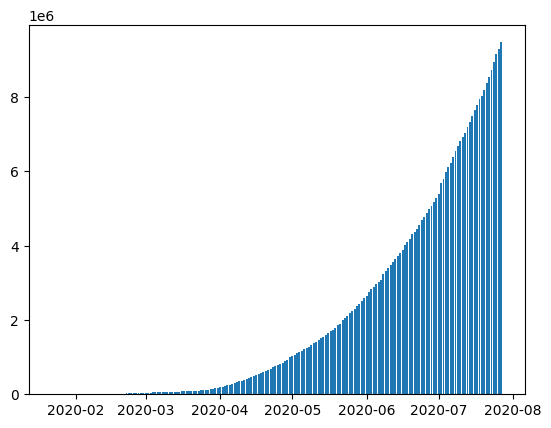

In [ ]:
plt.bar(t_cases_recovered['Date'],t_cases_recovered['Recovered'])

In [ ]:
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
top_20=df.groupby('Country')['Active'].sum().reset_index().sort_values(by='Active',ascending=False).head(20)
top_20

,Country,Active
173,US,156981121
23,Brazil,31094060
177,United Kingdom,22624595
138,Russia,19668578
79,India,15987913
61,France,10980287
157,Spain,9277432
32,Canada,8656985
132,Peru,7748957
85,Italy,7363518


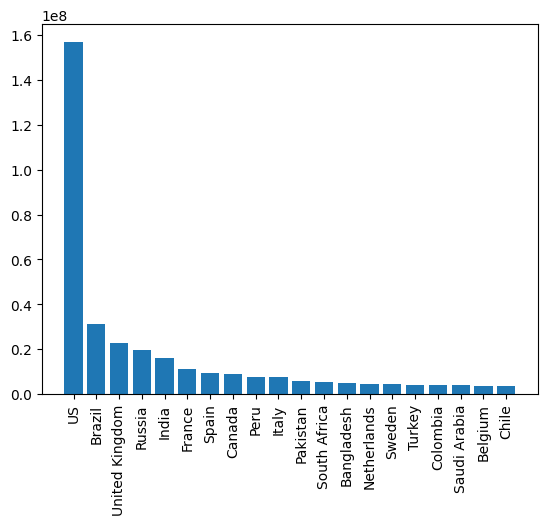

In [ ]:
plt.bar(top_20['Country'],top_20['Active'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
pip install Prophet

In [ ]:
from prophet import Prophet

In [ ]:
t_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
t_cases.columns=['ds','y']
t_cases.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
t_cases['ds']=pd.to_datetime(t_cases['ds'])


In [ ]:
t_cases

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
model=Prophet()
model

In [ ]:
model.fit(t_cases)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8_fi5t7q/9rlp3efd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8_fi5t7q/pq1hwucp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1077', 'data', 'file=/tmp/tmp8_fi5t7q/9rlp3efd.json', 'init=/tmp/tmp8_fi5t7q/pq1hwucp.json', 'output', 'file=/tmp/tmp8_fi5t7q/prophet_model_f215veb/prophet_model-20240102051254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=7,freq='D')
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
forecase=model.predict(future)
forecase

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.303118e+05,8.677730e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.181925e+05,1.040726e+05,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.574309e+04,1.094429e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.264288e+04,1.201309e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.315570e+04,1.192877e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.664534e+07,1.685546e+07,1.673935e+07,1.675032e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685760e+07,1.706689e+07,1.693745e+07,1.696070e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705594e+07,1.727984e+07,1.713371e+07,1.717123e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.723711e+07,1.747513e+07,1.732675e+07,1.738256e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:
forecase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          195 non-null    datetime64[ns]
 1   trend                       195 non-null    float64       
 2   yhat_lower                  195 non-null    float64       
 3   yhat_upper                  195 non-null    float64       
 4   trend_lower                 195 non-null    float64       
 5   trend_upper                 195 non-null    float64       
 6   additive_terms              195 non-null    float64       
 7   additive_terms_lower        195 non-null    float64       
 8   additive_terms_upper        195 non-null    float64       
 9   weekly                      195 non-null    float64       
 10  weekly_lower                195 non-null    float64       
 11  weekly_upper                195 non-null    float64       

In [ ]:
forecase[['yhat','yhat_lower','yhat_upper']]=forecase[['yhat','yhat_lower','yhat_upper']].astype(int)

In [ ]:
forecase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          195 non-null    datetime64[ns]
 1   trend                       195 non-null    float64       
 2   yhat_lower                  195 non-null    int64         
 3   yhat_upper                  195 non-null    int64         
 4   trend_lower                 195 non-null    float64       
 5   trend_upper                 195 non-null    float64       
 6   additive_terms              195 non-null    float64       
 7   additive_terms_lower        195 non-null    float64       
 8   additive_terms_upper        195 non-null    float64       
 9   weekly                      195 non-null    float64       
 10  weekly_lower                195 non-null    float64       
 11  weekly_upper                195 non-null    float64       

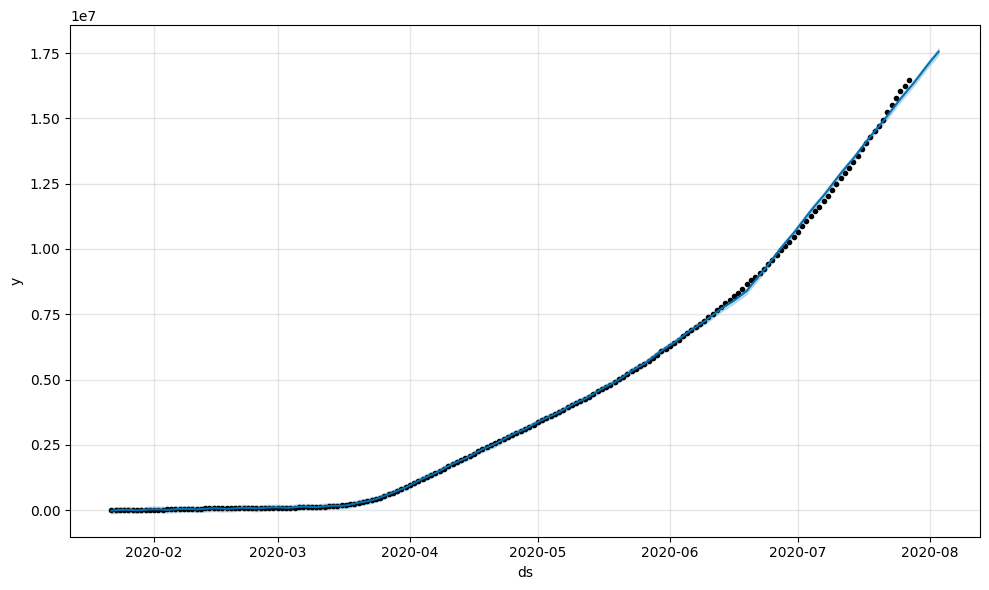

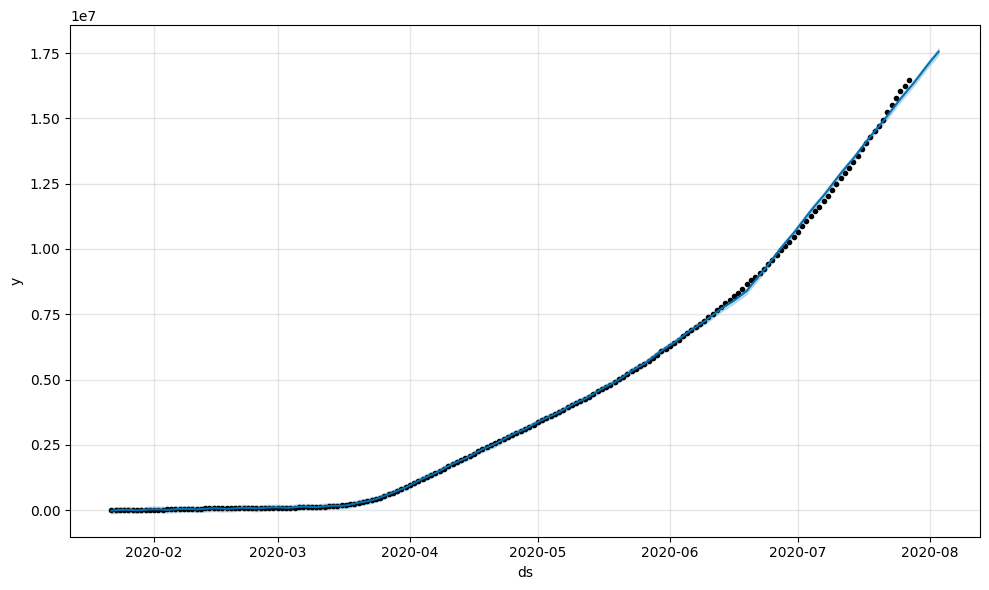

In [ ]:
plot=model.plot(forecase)
plot

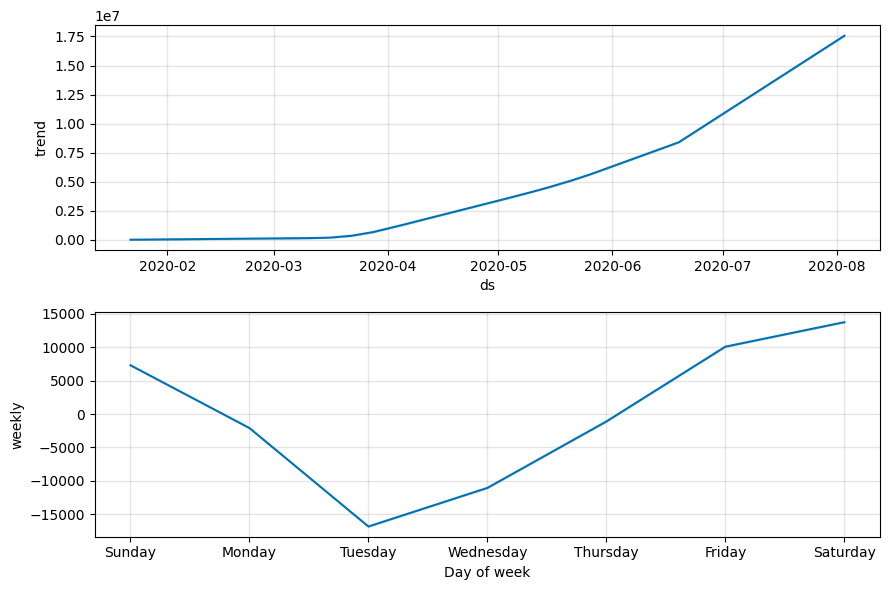

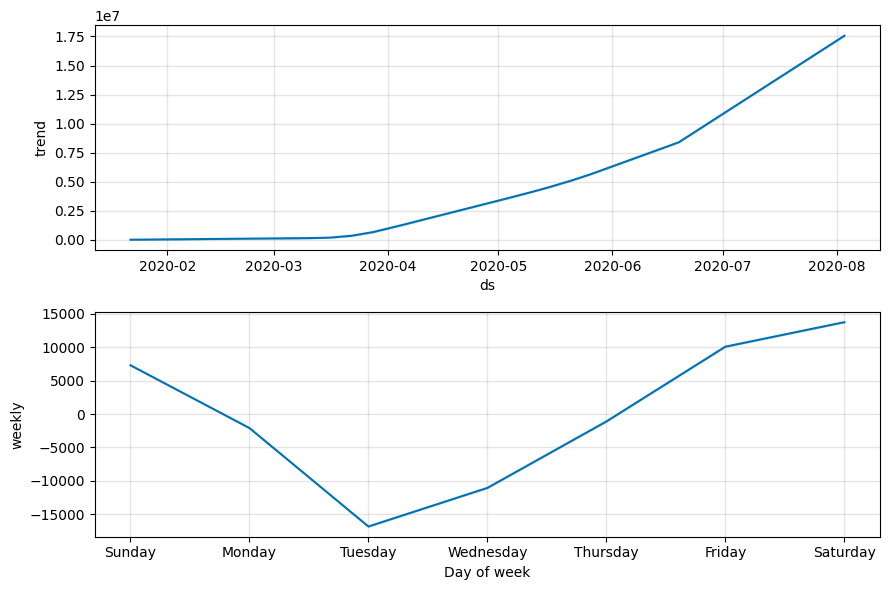

In [ ]:
model.plot_components(forecase)